#### EP4130: Data Science Analysis

#### Assignment 2

#### Tanmay Goyal- AI20BTECH11021

In [6]:
# importing required libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd

**Question 1**

Demonstrate the Central Limit Theorem for samples drawn from a ch-square distribution with the 3 degrees of freedom, for samples drawn once, 3 times and 5 times.

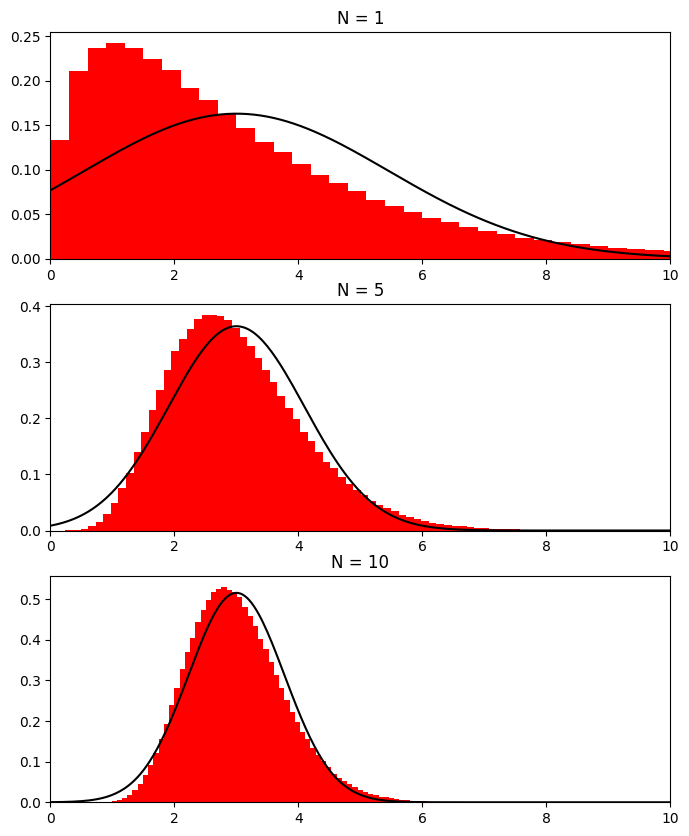

In [7]:
# generating points from chisquare distribution
points = np.random.chisquare(3 , size = (1000000 , 10))

# mean of gaussian should be degree of freedom
# std of gaussian should be sqrt(2*degree of freedom) / sqrt(number of samples)
# the number of samples would be changed for each plot
mu = 3
std = np.sqrt(2*3)

# defining x
x = np.linspace(points.min() , points.max() , 1000)

# setting the figure
plt.figure(figsize = (8,10))

# when samples are taken once
plt.subplot(3,1,1)
plt.hist(points[: , : 1].mean(axis = 1), bins=100, density=True , color = 'red')
y = sp.stats.norm.pdf(x , mu , std / np.sqrt(1))
plt.plot(x , y , 'k-')
plt.xlim(0,10)
plt.title("N = 1")

# when samples are taken five times
plt.subplot(3,1,2)
plt.hist(points[: , :5].mean(axis = 1), bins=100, density=True , color = 'red')
y = sp.stats.norm.pdf(x , mu , std / np.sqrt(5))
plt.plot(x , y , 'k-')
plt.xlim(0,10)
plt.title("N = 5")

# when samples are taken ten times
plt.subplot(3,1,3)
plt.hist(points.mean(axis = 1), bins=100, density=True , color = 'red')
y = sp.stats.norm.pdf(x , mu , std / np.sqrt(10))
plt.plot(x , y , 'k-')
plt.xlim(0,10)
plt.title("N = 10")

plt.show()

**Question 2**

Plot luminosity as a function of the red-shift on a log-log scale. Find the Pearson, Spearman, and Kendall-tau correlation coefficients.

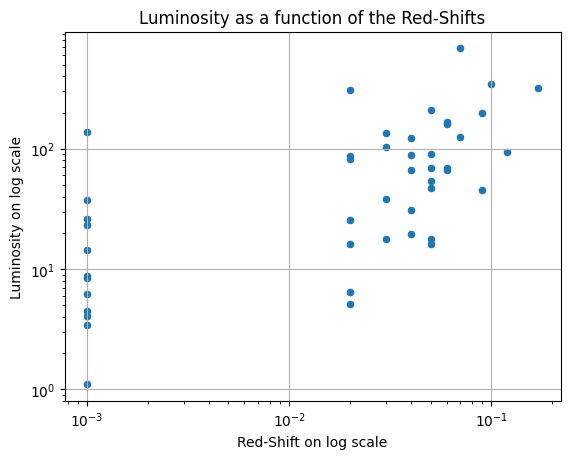

From eye, some part of the data does seem correlated.
The Pearson Correlation coefficient is 0.5144497852670243 and the p_value is 0.00025464716576124137 
The Spearman Correlation coefficient is 0.6596325957535454 and the p_value is 6.166489759081011e-07 
The Kendall-tau Correlation coefficient is 0.5029584682704178 and the p_value is 2.9696862274734036e-06 


In [8]:
# obtaining the data
df = pd.read_csv("https://people.iith.ac.in/shantanud/test.dat" , sep = " ")
df.plot(x = "z" , y = "#Lx" , kind = "scatter" , logx = True , logy = True, \
    xlabel = "Red-Shift on log scale" , ylabel = "Luminosity on log scale")

plt.grid(True)
plt.title("Luminosity as a function of the Red-Shifts")
plt.show()

print("From eye, some part of the data does seem correlated.")

pearson = sp.stats.pearsonr(df["z"] , df["#Lx"])
print("The Pearson Correlation coefficient is {} and the p_value is {} ".format(pearson[0] , pearson[1]))

spearman = sp.stats.spearmanr(df["z"] , df["#Lx"])
print("The Spearman Correlation coefficient is {} and the p_value is {} ".format(spearman[0] , spearman[1]))

kendall = sp.stats.kendalltau(df["z"] , df["#Lx"])
print("The Kendall-tau Correlation coefficient is {} and the p_value is {} ".format(kendall[0] , kendall[1]))

**Question 3**

Using the data provided on the Swiss Wind Power data website, plot the probability distribution and overlay the
best-fit Weibull distribution.

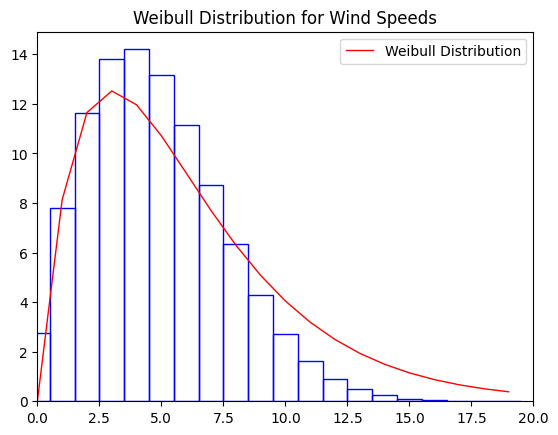

In [9]:
# defining x
x = np.arange(0, 20, 1)

# calculating the weibull distribution
k = 2.
A = 6.
weibull = A * (k / A) ** k * x ** (k-1) * np.exp(-(k / A)*x)
weibull /= weibull.sum()
weibull *= 100

# acquiring the data from the website
speeds = [2.75, 7.80, 11.64, 13.79, 14.20, 13.15, 11.14, 8.72, 6.34, 4.30, 2.73, 1.62, 0.91, 0.48, 0.24, 0.11, 0.05, 0.02, 0.01, 0.00]

# plotting the graph
plt.bar(x , speeds , color = "none" , edgecolor = "blue" , width = 1)
plt.plot(x , weibull , 'r-' , linewidth = 1 , label = "Weibull Distribution")
plt.legend()
plt.xlim(0, 20)
plt.title("Weibull Distribution for Wind Speeds")
plt.show()

**Question 4**

Create 2 arrays of 1000 points from a Gaussian Distribution with mean 0 and standard deviation 1. Calculate the Pearson correlation coefficients and the p-value. Check if the p-value agrees with that calculated using Student t-distribution.

Answer

We have, 

$t = r \times \sqrt{\frac{N-2}{1-r^2}}$

In [10]:
# generating the two arrays
arr1 = np.random.normal(0,1,1000)
arr2 = np.random.normal(0,1,1000)

# finding pearson correlation
pearson = sp.stats.pearsonr(arr1 , arr2)
print("The Pearson Correlation coefficient is {} and the p_value is {} ".format(pearson[0] , pearson[1]))

t = pearson[0] * np.sqrt(998 / 1 - pearson[0]**2) 

print("The value of t we obtain is : " , t)

# since it is two sided error, we multiply by 2
print("The p_value we obtain from student t-distribution is : " , 2 * (1 - sp.stats.t.cdf(np.abs(t) , 998)))


The Pearson Correlation coefficient is -0.033105088005027164 and the p_value is 0.29562931284596633 
The value of t we obtain is :  -1.045826829363949
The p_value we obtain from student t-distribution is :  0.29589422307476143
